# xarray demo

See the xarray documentation for much, much more: http://xarray.pydata.org/en/stable/

"Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience."

#### xarray is essentially an interactive NetCDF file.

In [1]:
# general use packages
import numpy as np
import matplotlib.pyplot as plt
from dask.distributed import Client
import xarray as xr
import cmocean

#packages for making maps
import cartopy.crs as ccrs

#MITgcm specific
from xmitgcm import open_mdsdataset

### Load in results using `open_mdsdataset`

This uses the xmitgcm routine to convert MITgcm binary output into an xarray dataset.

In [5]:
grid_dir = '/scratch2/shared/xarray-demo/pig-machine/grid/'
diags_dir = '/scratch2/shared/xarray-demo/pig-machine/diags/'
ds = open_mdsdataset(data_dir=diags_dir,grid_dir=grid_dir,geometry='sphericalpolar',delta_t=300,calendar='model')

## 1. The DataArray

`DataArray`s are objects which contain a single field or 'data-variable', along with the underlying dimensions
and coordinates upon which the field is defined. 

In [6]:
# don't worry about this notation for now...
xda = ds.SHIfwFlx.copy().reset_coords(drop=True).load();

In [7]:
xda

<xarray.DataArray 'SHIfwFlx' (time: 1, YC: 180, XC: 180)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time     (time) timedelta64[ns] 3600 days
  * XC       (XC) >f8 -102.7 -102.7 -102.7 -102.7 ... -99.05 -99.03 -99.01
  * YC       (YC) >f8 -75.44 -75.43 -75.43 -75.42 ... -74.48 -74.48 -74.47
Attributes:
    standard_name:  SHIfwFlx
    long_name:      Ice shelf fresh water flux (positive upward)
    units:          kg/m^2/s

### Top line tells us about the variable
- field name: 'SHIfwFlx'
- dimensions, as a `tuple`: time, Y, X

In [8]:
xda.name

'SHIfwFlx'

In [9]:
xda.dims

('time', 'YC', 'XC')

Already we have a good feel for this field: it is a function of space (2D) and time.

### Underlying data structure

xarray is essentially a wrapper around "numpy-like" arrays which provides labels (and many other nice features).
The DataArray class has methods similar to numpy arrays which allow us to look at the data. For instance:

In [10]:
xda.shape

(1, 180, 180)

Additionally we can access the underlying numpy array with either of the two methods `.data` `.values`.
In this case they are equivalent, but I will show how they differ later.

In [11]:
nparr = xda.data
nparr2 = xda.values

In [12]:
nparr

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [13]:
nparr.shape

(1, 180, 180)

In [14]:
np.all(nparr==nparr2)

True

### Coordinates

In [15]:
xda.coords

Coordinates:
  * time     (time) timedelta64[ns] 3600 days
  * XC       (XC) >f8 -102.7 -102.7 -102.7 -102.7 ... -99.05 -99.03 -99.01
  * YC       (YC) >f8 -75.44 -75.43 -75.43 -75.42 ... -74.48 -74.48 -74.47

The `DataArray` has coordinates packed into it, each of which are themselves 
`DataArray`s that define the dimensions of the data variable. Lets take a look, for example at `XC`:

In [16]:
xda.XC

<xarray.DataArray 'XC' (XC: 180)>
array([-102.739583, -102.71875 , -102.697917, -102.677083, -102.65625 ,
       -102.635417, -102.614584, -102.59375 , -102.572917, -102.552084,
       -102.53125 , -102.510417, -102.489584, -102.46875 , -102.447917,
       -102.427084, -102.406251, -102.385417, -102.364584, -102.343751,
       -102.322917, -102.302084, -102.281251, -102.260417, -102.239584,
       -102.218751, -102.197918, -102.177084, -102.156251, -102.135418,
       -102.114584, -102.093751, -102.072918, -102.052084, -102.031251,
       -102.010418, -101.989585, -101.968751, -101.947918, -101.927085,
       -101.906251, -101.885418, -101.864585, -101.843751, -101.822918,
       -101.802085, -101.781252, -101.760418, -101.739585, -101.718752,
       -101.697918, -101.677085, -101.656252, -101.635418, -101.614585,
       -101.593752, -101.572919, -101.552085, -101.531252, -101.510419,
       -101.489585, -101.468752, -101.447919, -101.427085, -101.406252,
       -101.385419, -101.364586, -101.343752, -101.322919, -101.302086,
       -101.281252, -101.260419, -101.239586, -101.218752, -101.197919,
       -101.177086, -101.156253, -101.135419, -101.114586, -101.093753,
       -101.072919, -101.052086, -101.031253, -101.010419, -100.989586,
       -100.968753, -100.94792 , -100.927086, -100.906253, -100.88542 ,
       -100.864586, -100.843753, -100.82292 , -100.802086, -100.781253,
       -100.76042 , -100.739587, -100.718753, -100.69792 , -100.677087,
       -100.656253, -100.63542 , -100.614587, -100.593753, -100.57292 ,
       -100.552087, -100.531254, -100.51042 , -100.489587, -100.468754,
       -100.44792 , -100.427087, -100.406254, -100.38542 , -100.364587,
       -100.343754, -100.322921, -100.302087, -100.281254, -100.260421,
       -100.239587, -100.218754, -100.197921, -100.177087, -100.156254,
       -100.135421, -100.114588, -100.093754, -100.072921, -100.052088,
       -100.031254, -100.010421,  -99.989588,  -99.968754,  -99.947921,
        -99.927088,  -99.906255,  -99.885421,  -99.864588,  -99.843755,
        -99.822921,  -99.802088,  -99.781255,  -99.760421,  -99.739588,
        -99.718755,  -99.697922,  -99.677088,  -99.656255,  -99.635422,
        -99.614588,  -99.593755,  -99.572922,  -99.552088,  -99.531255,
        -99.510422,  -99.489589,  -99.468755,  -99.447922,  -99.427089,
        -99.406255,  -99.385422,  -99.364589,  -99.343755,  -99.322922,
        -99.302089,  -99.281256,  -99.260422,  -99.239589,  -99.218756,
        -99.197922,  -99.177089,  -99.156256,  -99.135422,  -99.114589,
        -99.093756,  -99.072923,  -99.052089,  -99.031256,  -99.010423])
Coordinates:
  * XC       (XC) >f8 -102.7 -102.7 -102.7 -102.7 ... -99.05 -99.03 -99.01
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    coordinate:     YC XC
    axis:           X

See how we have a nice, self contained variable where there is no "guess-work" as to what's going on.

The variables within the `DataArray` object can be accessed as instance variables as above, but they are 
contained as dicts, and so can be accessed as such:

In [17]:
xda['XC']

<xarray.DataArray 'XC' (XC: 180)>
array([-102.739583, -102.71875 , -102.697917, -102.677083, -102.65625 ,
       -102.635417, -102.614584, -102.59375 , -102.572917, -102.552084,
       -102.53125 , -102.510417, -102.489584, -102.46875 , -102.447917,
       -102.427084, -102.406251, -102.385417, -102.364584, -102.343751,
       -102.322917, -102.302084, -102.281251, -102.260417, -102.239584,
       -102.218751, -102.197918, -102.177084, -102.156251, -102.135418,
       -102.114584, -102.093751, -102.072918, -102.052084, -102.031251,
       -102.010418, -101.989585, -101.968751, -101.947918, -101.927085,
       -101.906251, -101.885418, -101.864585, -101.843751, -101.822918,
       -101.802085, -101.781252, -101.760418, -101.739585, -101.718752,
       -101.697918, -101.677085, -101.656252, -101.635418, -101.614585,
       -101.593752, -101.572919, -101.552085, -101.531252, -101.510419,
       -101.489585, -101.468752, -101.447919, -101.427085, -101.406252,
       -101.385419, -101.364586, -101.343752, -101.322919, -101.302086,
       -101.281252, -101.260419, -101.239586, -101.218752, -101.197919,
       -101.177086, -101.156253, -101.135419, -101.114586, -101.093753,
       -101.072919, -101.052086, -101.031253, -101.010419, -100.989586,
       -100.968753, -100.94792 , -100.927086, -100.906253, -100.88542 ,
       -100.864586, -100.843753, -100.82292 , -100.802086, -100.781253,
       -100.76042 , -100.739587, -100.718753, -100.69792 , -100.677087,
       -100.656253, -100.63542 , -100.614587, -100.593753, -100.57292 ,
       -100.552087, -100.531254, -100.51042 , -100.489587, -100.468754,
       -100.44792 , -100.427087, -100.406254, -100.38542 , -100.364587,
       -100.343754, -100.322921, -100.302087, -100.281254, -100.260421,
       -100.239587, -100.218754, -100.197921, -100.177087, -100.156254,
       -100.135421, -100.114588, -100.093754, -100.072921, -100.052088,
       -100.031254, -100.010421,  -99.989588,  -99.968754,  -99.947921,
        -99.927088,  -99.906255,  -99.885421,  -99.864588,  -99.843755,
        -99.822921,  -99.802088,  -99.781255,  -99.760421,  -99.739588,
        -99.718755,  -99.697922,  -99.677088,  -99.656255,  -99.635422,
        -99.614588,  -99.593755,  -99.572922,  -99.552088,  -99.531255,
        -99.510422,  -99.489589,  -99.468755,  -99.447922,  -99.427089,
        -99.406255,  -99.385422,  -99.364589,  -99.343755,  -99.322922,
        -99.302089,  -99.281256,  -99.260422,  -99.239589,  -99.218756,
        -99.197922,  -99.177089,  -99.156256,  -99.135422,  -99.114589,
        -99.093756,  -99.072923,  -99.052089,  -99.031256,  -99.010423])
Coordinates:
  * XC       (XC) >f8 -102.7 -102.7 -102.7 -102.7 ... -99.05 -99.03 -99.01
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    coordinate:     YC XC
    axis:           X

### Attributes: 
Provided as a dictionary, allow us to carry around important meta information associated with the 
variable

In [18]:
xda.attrs

{'standard_name': 'SHIfwFlx',
 'long_name': 'Ice shelf fresh water flux (positive upward)',
 'units': 'kg/m^2/s'}

In [19]:
xda.attrs['units']

'kg/m^2/s'

## 2. Datasets

Are similar objects, that are essentially dictionaries containing a lot of fields, or "data-variables" as `DataArray`s. 
Consider the original `Dataset` I loaded earlier.

In [20]:
ds

<xarray.Dataset>
Dimensions:    (XC: 180, XG: 180, YC: 180, YG: 180, Z: 62, Zl: 62, Zp1: 63, Zu: 62, time: 1)
Coordinates:
    iter       (time) int64 1036800
  * time       (time) timedelta64[ns] 3600 days
  * XC         (XC) >f8 -102.7 -102.7 -102.7 -102.7 ... -99.05 -99.03 -99.01
  * YC         (YC) >f8 -75.44 -75.43 -75.43 -75.42 ... -74.48 -74.48 -74.47
  * XG         (XG) >f8 -102.8 -102.7 -102.7 -102.7 ... -99.06 -99.04 -99.02
  * YG         (YG) >f8 -75.44 -75.43 -75.43 -75.42 ... -74.48 -74.48 -74.47
  * Z          (Z) >f8 -10.0 -30.0 -50.0 -70.0 ... -1.19e+03 -1.21e+03 -1.23e+03
  * Zp1        (Zp1) >f8 0.0 -20.0 -40.0 -60.0 ... -1.2e+03 -1.22e+03 -1.24e+03
  * Zu         (Zu) >f8 -20.0 -40.0 -60.0 -80.0 ... -1.2e+03 -1.22e+03 -1.24e+03
  * Zl         (Zl) >f8 0.0 -20.0 -40.0 -60.0 ... -1.18e+03 -1.2e+03 -1.22e+03
    rA         (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    dxG        (YG, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    dyG        (YC, XG) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    Depth      (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rAz        (YG, XG) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    dxC        (YC, XG) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    dyC        (YG, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rAw        (YC, XG) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rAs        (YG, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    drC        (Zp1) >f8 10.0 20.0 20.0 20.0 20.0 ... 20.0 20.0 20.0 20.0 10.0
    drF        (Z) >f8 20.0 20.0 20.0 20.0 20.0 ... 20.0 20.0 20.0 20.0 20.0
    PHrefC     (Z) >f8 98.1 294.3 490.5 686.7 ... 1.167e+04 1.187e+04 1.207e+04
    PHrefF     (Zp1) >f8 0.0 196.2 392.4 588.6 ... 1.177e+04 1.197e+04 1.216e+04
    hFacC      (Z, YC, XC) >f8 dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    hFacW      (Z, YC, XG) >f8 dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    hFacS      (Z, YG, XC) >f8 dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskC      (Z, YC, XC) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskW      (Z, YC, XG) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskS      (Z, YG, XC) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskCtrlC  (Z, YC, XC) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskCtrlI  (Z, YC, XC) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskCtrlS  (Z, YG, XC) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskCtrlW  (Z, YC, XG) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskInC    (YC, XC) bool dask.array<chunksize=(180, 180), meta=np.ndarray>
    maskInS    (YG, XC) bool dask.array<chunksize=(180, 180), meta=np.ndarray>
    maskInW    (YC, XG) bool dask.array<chunksize=(180, 180), meta=np.ndarray>
    rhoRef     (Z) >f8 1.028e+03 1.028e+03 1.028e+03 ... 1.034e+03 1.034e+03
    rLowC      (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rLowS      (YG, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rLowW      (YC, XG) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rSurfC     (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rSurfS     (YG, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rSurfW     (YC, XG) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
Data variables:
    UVELMASS   (time, Z, YC, XG) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    VVELMASS   (time, Z, YG, XC) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    WVELMASS   (time, Zl, YC, XC) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    THETA      (time, Z, YC, XC) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    SALT       (time, Z, YC, XC) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    RHOAnoma   (tim

### Data variables

Are `DataArray`s containing each of the fields that we care about

In [21]:
ds.data_vars

Data variables:
    UVELMASS  (time, Z, YC, XG) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    VVELMASS  (time, Z, YG, XC) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    WVELMASS  (time, Zl, YC, XC) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    THETA     (time, Z, YC, XC) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    SALT      (time, Z, YC, XC) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    RHOAnoma  (time, Z, YC, XC) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    ETAN      (time, YC, XC) >f8 dask.array<chunksize=(1, 180, 180), meta=np.ndarray>
    MXLDEPTH  (time, YC, XC) >f8 dask.array<chunksize=(1, 180, 180), meta=np.ndarray>
    SHIfwFlx  (time, YC, XC) >f8 dask.array<chunksize=(1, 180, 180), meta=np.ndarray>
    SHIhtFlx  (time, YC, XC) >f8 dask.array<chunksize=(1, 180, 180), meta=np.ndarray>
    SHIgammT  (time, YC, XC) >f8 dask.array<chunksize=(1, 180, 180), meta=np.ndar

1. Note that we get a nice, concise view of our variables, including the dimensions, datatype (`float64`), shape, 
    and some information about the array (I'll discuss `dask.array` at the end of the talk.
2. Not all of the fields have the same dimensions! But our `Dataset` has everything necessary inside

In [22]:
ds.coords

Coordinates:
    iter       (time) int64 1036800
  * time       (time) timedelta64[ns] 3600 days
  * XC         (XC) >f8 -102.7 -102.7 -102.7 -102.7 ... -99.05 -99.03 -99.01
  * YC         (YC) >f8 -75.44 -75.43 -75.43 -75.42 ... -74.48 -74.48 -74.47
  * XG         (XG) >f8 -102.8 -102.7 -102.7 -102.7 ... -99.06 -99.04 -99.02
  * YG         (YG) >f8 -75.44 -75.43 -75.43 -75.42 ... -74.48 -74.48 -74.47
  * Z          (Z) >f8 -10.0 -30.0 -50.0 -70.0 ... -1.19e+03 -1.21e+03 -1.23e+03
  * Zp1        (Zp1) >f8 0.0 -20.0 -40.0 -60.0 ... -1.2e+03 -1.22e+03 -1.24e+03
  * Zu         (Zu) >f8 -20.0 -40.0 -60.0 -80.0 ... -1.2e+03 -1.22e+03 -1.24e+03
  * Zl         (Zl) >f8 0.0 -20.0 -40.0 -60.0 ... -1.18e+03 -1.2e+03 -1.22e+03
    rA         (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    dxG        (YG, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    dyG        (YC, XG) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    Depth      (YC, XC) >f8 dask.array<c

This dataset has *a lot* of coordines. 
However, the most important are the coordinates which define any dimensions of the variables. 
These have a * next to them.
The other coordinates are nice because they help define the domain which our data live in.

### Global meta information

Just like how the `DataArray` had meta information as the dictionary `attrs`, our `Dataset` can have this 
nice information too. We can add some as follows: 

In [23]:
ds.attrs['author'] = 'Tim Smith'
ds.attrs['simulation'] = 'Pine Island sub-ice-shelf circulation'
ds.attrs['model'] = 'Massachussetts Institute of Technology general circulation model (MITgcm)'
ds.attrs['discretization'] = 'Structured Finite Volume Grid'
ds.attrs['geometry'] = 'Spherical Polar Coordinates'
ds.attrs['Arakawa_grid'] = 'C'

In [24]:
ds

<xarray.Dataset>
Dimensions:    (XC: 180, XG: 180, YC: 180, YG: 180, Z: 62, Zl: 62, Zp1: 63, Zu: 62, time: 1)
Coordinates:
    iter       (time) int64 1036800
  * time       (time) timedelta64[ns] 3600 days
  * XC         (XC) >f8 -102.7 -102.7 -102.7 -102.7 ... -99.05 -99.03 -99.01
  * YC         (YC) >f8 -75.44 -75.43 -75.43 -75.42 ... -74.48 -74.48 -74.47
  * XG         (XG) >f8 -102.8 -102.7 -102.7 -102.7 ... -99.06 -99.04 -99.02
  * YG         (YG) >f8 -75.44 -75.43 -75.43 -75.42 ... -74.48 -74.48 -74.47
  * Z          (Z) >f8 -10.0 -30.0 -50.0 -70.0 ... -1.19e+03 -1.21e+03 -1.23e+03
  * Zp1        (Zp1) >f8 0.0 -20.0 -40.0 -60.0 ... -1.2e+03 -1.22e+03 -1.24e+03
  * Zu         (Zu) >f8 -20.0 -40.0 -60.0 -80.0 ... -1.2e+03 -1.22e+03 -1.24e+03
  * Zl         (Zl) >f8 0.0 -20.0 -40.0 -60.0 ... -1.18e+03 -1.2e+03 -1.22e+03
    rA         (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    dxG        (YG, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    dyG        (YC, XG) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    Depth      (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rAz        (YG, XG) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    dxC        (YC, XG) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    dyC        (YG, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rAw        (YC, XG) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rAs        (YG, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    drC        (Zp1) >f8 10.0 20.0 20.0 20.0 20.0 ... 20.0 20.0 20.0 20.0 10.0
    drF        (Z) >f8 20.0 20.0 20.0 20.0 20.0 ... 20.0 20.0 20.0 20.0 20.0
    PHrefC     (Z) >f8 98.1 294.3 490.5 686.7 ... 1.167e+04 1.187e+04 1.207e+04
    PHrefF     (Zp1) >f8 0.0 196.2 392.4 588.6 ... 1.177e+04 1.197e+04 1.216e+04
    hFacC      (Z, YC, XC) >f8 dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    hFacW      (Z, YC, XG) >f8 dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    hFacS      (Z, YG, XC) >f8 dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskC      (Z, YC, XC) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskW      (Z, YC, XG) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskS      (Z, YG, XC) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskCtrlC  (Z, YC, XC) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskCtrlI  (Z, YC, XC) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskCtrlS  (Z, YG, XC) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskCtrlW  (Z, YC, XG) bool dask.array<chunksize=(62, 180, 180), meta=np.ndarray>
    maskInC    (YC, XC) bool dask.array<chunksize=(180, 180), meta=np.ndarray>
    maskInS    (YG, XC) bool dask.array<chunksize=(180, 180), meta=np.ndarray>
    maskInW    (YC, XG) bool dask.array<chunksize=(180, 180), meta=np.ndarray>
    rhoRef     (Z) >f8 1.028e+03 1.028e+03 1.028e+03 ... 1.034e+03 1.034e+03
    rLowC      (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rLowS      (YG, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rLowW      (YC, XG) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rSurfC     (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rSurfS     (YG, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rSurfW     (YC, XG) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
Data variables:
    UVELMASS   (time, Z, YC, XG) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    VVELMASS   (time, Z, YG, XC) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    WVELMASS   (time, Zl, YC, XC) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    THETA      (time, Z, YC, XC) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    SALT       (time, Z, YC, XC) >f8 dask.array<chunksize=(1, 62, 180, 180), meta=np.ndarray>
    RHOAnoma   (tim

## 3. Labels and selecting data

xarray provides nice labels for our data, which allows convenient and easy to understand methods for 
accessing the data.

First, a comparison to numpy arrays with the method `.isel` = "index select"

In [25]:
xda.dims

('time', 'YC', 'XC')

In [26]:
xda.isel(time=0).dims
# or equivalently xda.isel({'time':0}).dims

('YC', 'XC')

In [27]:
np.all(xda.isel(time=0).values == nparr[0,:,:])

True

This is already easier to read than a simple numpy array, because we do not have to remember that time is along 
the first axis.

What if we want something more complicated, like temperature at 250m depth? Here we have the `.sel` method, which allows us to access data by coordinate values.

In [28]:
ds.THETA.dims

('time', 'Z', 'YC', 'XC')

In [29]:
ds.THETA.sel(Z=-250).dims

('time', 'YC', 'XC')

In [30]:
ds.THETA.sel(Z=-250)

<xarray.DataArray 'THETA' (time: 1, YC: 180, XC: 180)>
dask.array<getitem, shape=(1, 180, 180), dtype=>f8, chunksize=(1, 180, 180), chunktype=numpy.ndarray>
Coordinates:
    iter       (time) int64 1036800
  * time       (time) timedelta64[ns] 3600 days
  * XC         (XC) >f8 -102.7 -102.7 -102.7 -102.7 ... -99.05 -99.03 -99.01
  * YC         (YC) >f8 -75.44 -75.43 -75.43 -75.42 ... -74.48 -74.48 -74.47
    Z          >f8 -250.0
    rA         (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    Depth      (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    drF        >f8 20.0
    PHrefC     >f8 2.452e+03
    hFacC      (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    maskC      (YC, XC) bool dask.array<chunksize=(180, 180), meta=np.ndarray>
    maskCtrlC  (YC, XC) bool dask.array<chunksize=(180, 180), meta=np.ndarray>
    maskCtrlI  (YC, XC) bool dask.array<chunksize=(180, 180), meta=np.ndarray>
    maskInC    (YC, XC) bool dask.array<chunksize=(180, 180), meta=np.ndarray>
    rhoRef     >f8 1.029e+03
    rLowC      (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
    rSurfC     (YC, XC) >f8 dask.array<chunksize=(180, 180), meta=np.ndarray>
Attributes:
    standard_name:  THETA
    long_name:      Potential Temperature
    units:          degC

With `.sel` we can also easily grab nearest neighbors. 
See here, for example, the temperature slice nearest to $75^\circ$S

In [31]:
ds.THETA.sel(YC=-75,method='nearest').dims

('time', 'Z', 'XC')

We can also grab subsets easily

In [32]:
ds.THETA.shape

(1, 62, 180, 180)

In [33]:
ds.THETA.sel(YC=slice(-75.5,-75.3)).shape

(1, 62, 27, 180)

In [34]:
ds.THETA.sel(YC=slice(-75.5,-75.3)).YC.values

array([-75.43738085, -75.43214164, -75.42690059, -75.42165768,
       -75.41641294, -75.41116634, -75.40591791, -75.40066762,
       -75.39541548, -75.3901615 , -75.38490567, -75.37964799,
       -75.37438846, -75.36912708, -75.36386384, -75.35859876,
       -75.35333182, -75.34806303, -75.34279238, -75.33751989,
       -75.33224553, -75.32696932, -75.32169126, -75.31641133,
       -75.31112955, -75.30584591, -75.30056042])

We can also interpolate easily... similar to `scipy.interpolate.interp1d`

In [35]:
ds.THETA.interp(YC=[-75,-74.9],method='cubic')

<xarray.DataArray 'THETA' (time: 1, Z: 62, YC: 2, XC: 180)>
dask.array<transpose, shape=(1, 62, 2, 180), dtype=>f8, chunksize=(1, 62, 2, 180), chunktype=numpy.ndarray>
Coordinates:
    iter     (time) int64 1036800
  * time     (time) timedelta64[ns] 3600 days
  * XC       (XC) >f8 -102.7 -102.7 -102.7 -102.7 ... -99.05 -99.03 -99.01
  * Z        (Z) >f8 -10.0 -30.0 -50.0 -70.0 ... -1.19e+03 -1.21e+03 -1.23e+03
    rA       (YC, XC) >f8 dask.array<chunksize=(2, 180), meta=np.ndarray>
    Depth    (YC, XC) >f8 dask.array<chunksize=(2, 180), meta=np.ndarray>
    drF      (Z) >f8 20.0 20.0 20.0 20.0 20.0 20.0 ... 20.0 20.0 20.0 20.0 20.0
    PHrefC   (Z) >f8 98.1 294.3 490.5 686.7 ... 1.167e+04 1.187e+04 1.207e+04
    hFacC    (Z, YC, XC) >f8 dask.array<chunksize=(62, 2, 180), meta=np.ndarray>
    rhoRef   (Z) >f8 1.028e+03 1.028e+03 1.028e+03 ... 1.034e+03 1.034e+03
    rLowC    (YC, XC) >f8 dask.array<chunksize=(2, 180), meta=np.ndarray>
    rSurfC   (YC, XC) >f8 dask.array<chunksize=(2, 180), meta=np.ndarray>
  * YC       (YC) float64 -75.0 -74.9
Attributes:
    standard_name:  THETA
    long_name:      Potential Temperature
    units:          degC

## 4. Plotting

Is just super easy... 

These show the surface currents and salinity at the surface

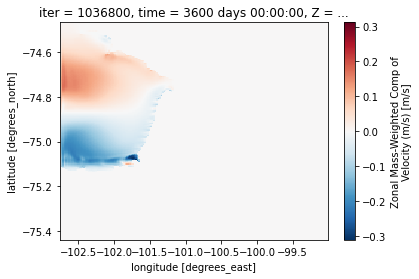

In [36]:
ds['UVELMASS'].isel(time=0,Z=0).plot()

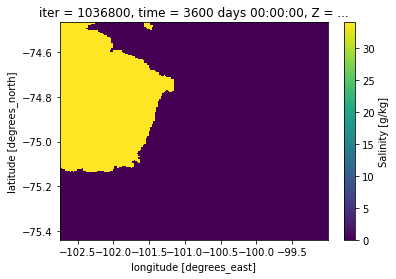

In [38]:
ds['SALT'].isel(time=0,Z=0).plot()

Note: 
- colorbar is: 
    - divergent for quantities which span above and below zero, and colormap is normalized to be symmetric about zero
    - sequential for quantities that don't
    
- axes, colorbar all labelled based on coordinates (x,y chosen by dimension order)

The `.plot` method takes standard matplotlib arguments to make this plot look however we want it to

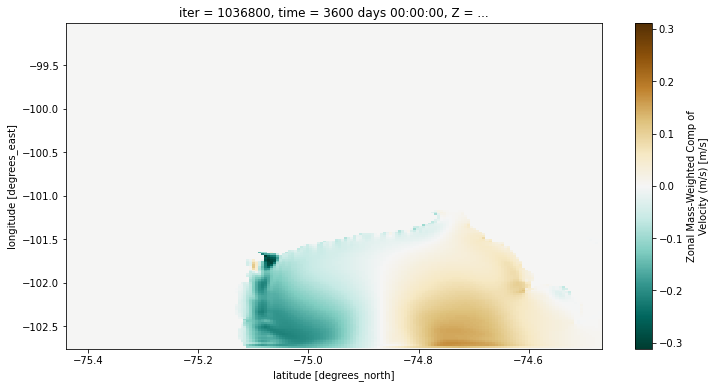

In [39]:
ds.UVELMASS.isel(time=0,Z=0).plot(figsize=(12,6),x='YC',cmap='BrBG_r')

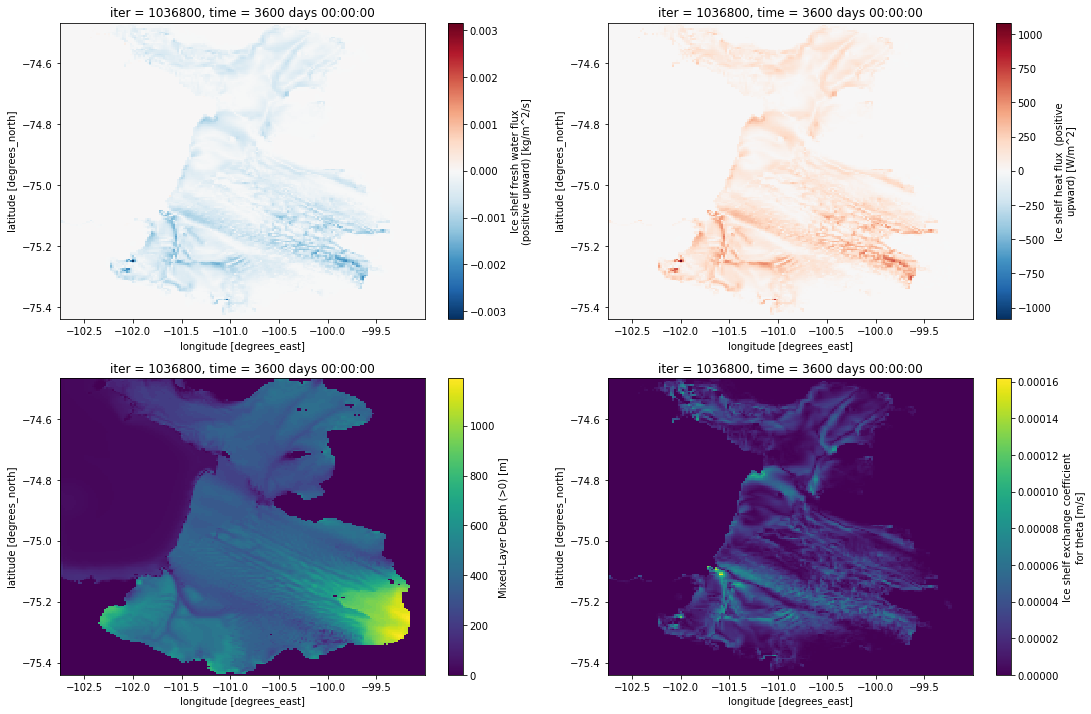

In [40]:
fig,axs=plt.subplots(2,2,figsize=(18,12))
for fld,ax in zip(['SHIfwFlx','SHIhtFlx','MXLDEPTH','SHIgammT'],axs.flat):
    ds[fld].isel(time=0).plot(ax=ax);

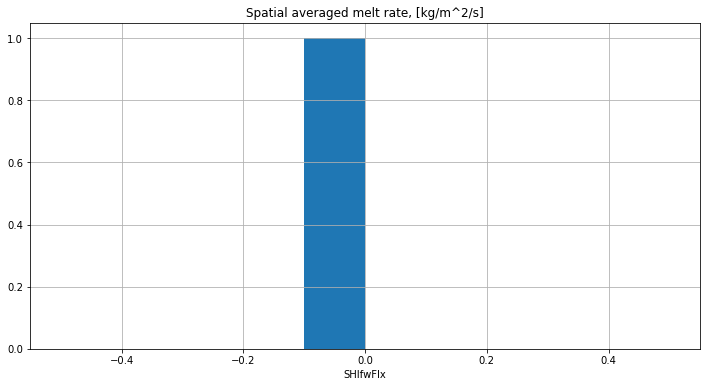

In [41]:
ds.SHIfwFlx.mean(dim=['XC','YC']).plot(figsize=(12,6))
plt.grid();
plt.title(f'Spatial averaged melt rate, [{ds.SHIfwFlx.attrs["units"]}]');

(array([2.00000e+00, 1.00000e+00, 1.15400e+03, 1.46200e+03, 1.47100e+03,
        6.33490e+04, 5.91830e+04, 1.64377e+06, 8.98850e+04, 1.48523e+05]),
 array([-3.87250049, -3.36787184, -2.8632432 , -2.35861456, -1.85398592,
        -1.34935727, -0.84472863, -0.34009999,  0.16452865,  0.6691573 ,
         1.17378594]),
 <BarContainer object of 10 artists>)

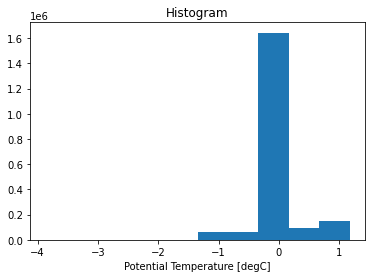

In [42]:
ds.THETA.plot()

The plots above show that when you try to plot data that have more than 2 dimensions, you get a histogram.

## 5. Labels and computation

Labeled data make it easy to understand computation. `xarray` has some built in `numpy` functions, such as `mean`, `std`, etc...

In [43]:
ds.THETA.mean(dim='Z').dims

('time', 'YC', 'XC')

Note that attributes get removed upon computation, as the units may or may not be preserved

In [44]:
ds.THETA.mean('Z').attrs

{}

In [45]:
ds.THETA.std(dim='time').dims

('Z', 'YC', 'XC')

xarray plays nicely with any `numpy.ufunc`:

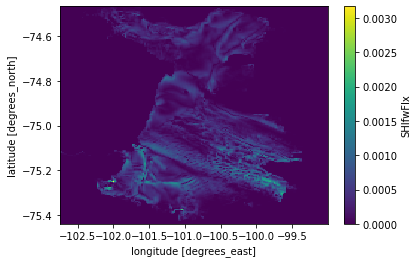

In [46]:
np.abs(ds['SHIfwFlx']).max('time').plot();

Custom functions can be applied to specific dimensions, see this example taken from [the documentation](http://xarray.pydata.org/en/stable/computation.html#wrapping-custom-computation) 
for a custom function which computes a vector norm across a specified dimension

In [47]:
def vector_norm(x, dim, ord=None):
    return xr.apply_ufunc(np.linalg.norm, x,
                          input_core_dims=[[dim]],
                          kwargs={'ord': ord, 'axis': -1})

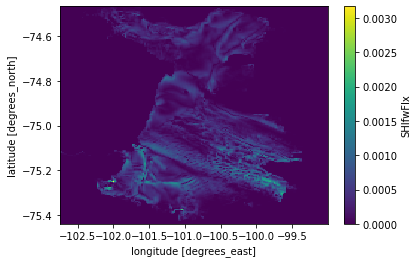

In [48]:
vector_norm(xda,dim='time',ord=1).plot()

## Time series operations: `groupby` and `apply`

This shows how, e.g. computing the seasonal cycle is easy with labelled computations.

Note we'll switch gears and use a netcdf file where I've precomputed the Meridional Overturning Circulation, and some
other quantities, from ECCOv4r3.
This also shows how easy it is to open a netcdf file with xarray.

In [50]:
moc = xr.open_dataset('/scratch2/shared/xarray-demo/ncfiles/eccov4r3_moc.nc')

In [51]:
moc

<xarray.Dataset>
Dimensions:            (k: 50, lat: 180, time: 288)
Coordinates:
  * lat                (lat) int64 -90 -89 -88 -87 -86 -85 ... 84 85 86 87 88 89
  * time               (time) datetime64[ns] 1992-01-16T12:00:00 ... 2015-12-...
  * k                  (k) int64 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49
    drF                (k) float32 ...
    PHrefC             (k) float32 ...
    Z                  (k) float32 ...
Data variables:
    global_vol_trsp_z  (time, k, lat) float64 ...
    global_psi_moc     (time, k, lat) float64 ...
    global_moc         (time, lat) float64 ...
    atl_vol_trsp_z     (time, k, lat) float64 ...
    atl_psi_moc        (time, k, lat) float64 ...
    atl_moc            (time, lat) float64 ...
    ind_vol_trsp_z     (time, k, lat) float64 ...
    ind_psi_moc        (time, k, lat) float64 ...
    ind_moc            (time, lat) float64 ...
    pac_vol_trsp_z     (time, k, lat) float64 ...
    pac_psi_moc        (time, k, lat) float64 ...
    pac_moc            (time, lat) float64 ...

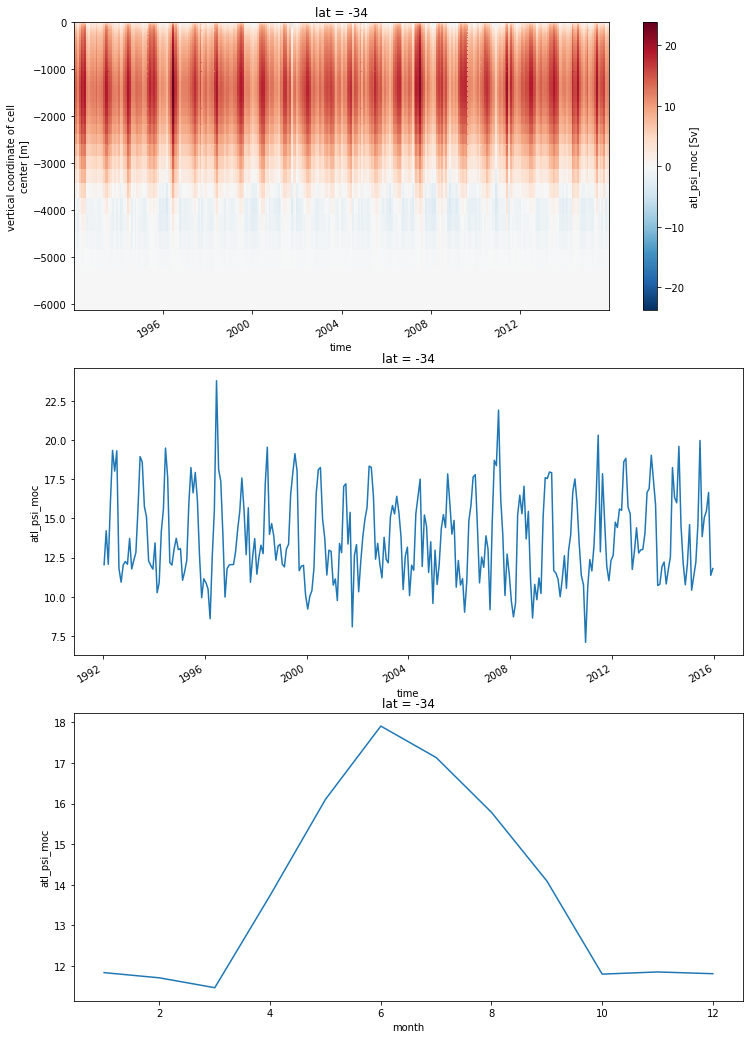

In [54]:
fig,axs = plt.subplots(3,1,figsize=(12,18))
moc.atl_psi_moc.sel(lat=-34).plot(ax=axs[0],x='time',y='Z');
moc.atl_psi_moc.sel(lat=-34).max('k').plot(ax=axs[1]);
moc.atl_psi_moc.sel(lat=-34).max('k').groupby('time.month').mean('time').plot(ax=axs[2]);

In [55]:
plt.rcParams.update({'figure.figsize':(18,6),'font.size':18})

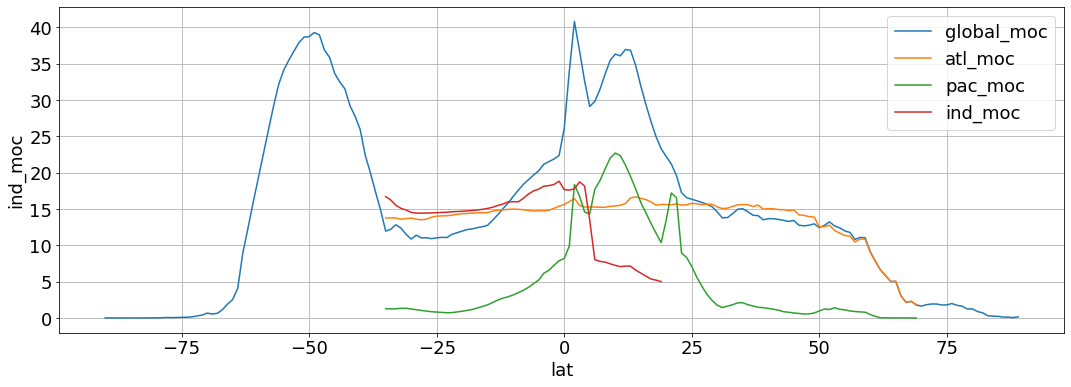

In [56]:
for fld in ['global_moc','atl_moc','pac_moc','ind_moc']:
    moc[fld].mean('time').plot(label=fld)
plt.legend()
plt.grid()

## 6. Playing well with others: pandas and netcdf 

### Converting to a `pandas.dataframe` is trivial...

In [57]:
xda.to_dataframe()

SHIfwFlx
time      YC         XC                   
3600 days -75.437381 -102.739583       0.0
                     -102.718750       0.0
                     -102.697917       0.0
                     -102.677083       0.0
                     -102.656250       0.0
...                                    ...
          -74.469608 -99.093756        0.0
                     -99.072923        0.0
                     -99.052089        0.0
                     -99.031256        0.0
                     -99.010423        0.0

[32400 rows x 1 columns]

### Reading and writing to netcdf is also dead simple...

In [58]:
ds.to_netcdf('example.nc')
!ls example.nc

example.nc


### This is to illustrate how we can make nice plot projections with few lines using xarray

In [60]:
new_ds = xr.open_dataset('/scratch2/shared/xarray-demo/ncfiles/bathymetry_south_american_coast_025x025deg.nc')

In [61]:
new_ds

<xarray.Dataset>
Dimensions:    (lat: 320, lon: 240)
Coordinates:
  * lat        (lat) float64 -65.0 -64.75 -64.5 -64.25 ... 14.0 14.25 14.5 14.75
  * lon        (lon) float64 -90.0 -89.75 -89.5 -89.25 ... -30.75 -30.5 -30.25
Data variables:
    elevation  (lat, lon) float64 ...

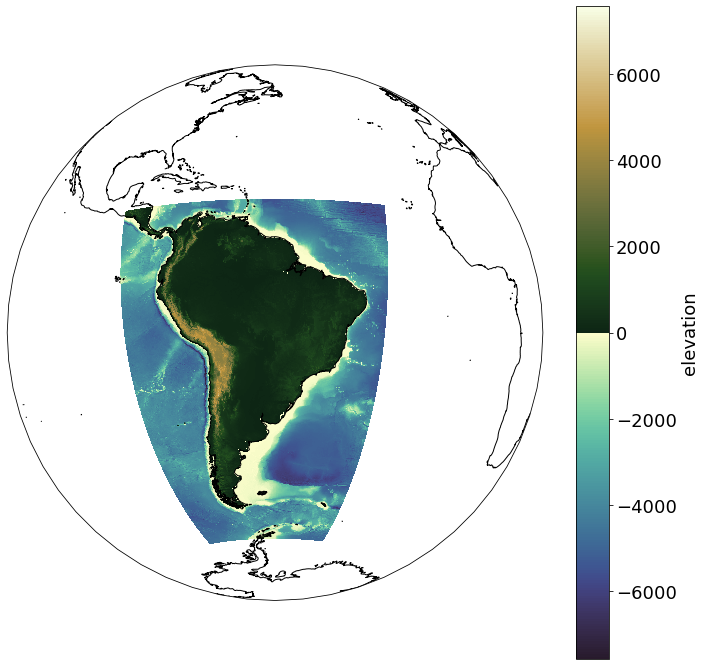

In [62]:
fig,ax = plt.subplots(1,1,figsize=(12,12),subplot_kw={'projection':ccrs.Orthographic(-55, -15)})
new_ds.elevation.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='cmo.topo');
ax.coastlines('50m');
ax.set_global();

## 7. Multitasking with `dask`

By default, xarray uses dask which "chunks" the data to smaller views which are operated on by individual workers.
Data are not by default loaded into memory. 
Rather, dask builds up a view of the data in an execution tree and operates on them lazily.

For xarray, this happens when 
1. you ask for the `.values`, or specifically call `.load()`
2. when you compute something (e.g. `.mean`)
3. when you plot something

Workers can be defined in a distributed or shared (default) paradigm, see https://dask.org/ for details.

In [63]:
ds.THETA.data

dask.array<getitem, shape=(1, 62, 180, 180), dtype=>f8, chunksize=(1, 62, 180, 180), chunktype=numpy.ndarray>

In [64]:
client=Client(n_workers=12)
client

Client Scheduler: tcp://127.0.0.1:42072 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 12 Cores: 36 Memory: 67.44 GB


## The bottom line

It takes a little upfront cost to integrate xarray into your data pipeline, and to learn some of the quirks of
the package. 
However, the benefits are:
- Code that is inherently less error prone
- Easier to share and communicate (even if the sharing is with your future self!)
- Seemingly easy way to get a quick look and work with complex data
- A flexible pipeline for small, in memory problems to out-of-memory, distributed architecture problems

## xgcm

xgcm is a rapidly developing project aimed at performing common functions used for grid based data.
It makes doing things like computing derivatives or taking averages, a breeze.
The operations are necessary extensions of xarray because xgcm holds onto the concept of a grid, which keeps track of
where different quantities are located.
For instance, on a finite volume grid flux quantities are located on the cell faces, while tracer or volumetric 
quantities are considered to be located a the cell center.

See more about xgcm here: https://xgcm.readthedocs.io/en/latest/

Note that neither xarray or xgcm work out of the box for unstructured data.

In [65]:
from xgcm import Grid

In [66]:
grid = Grid(ds,periodic=False)
grid

<xgcm.Grid>
X Axis (not periodic, boundary=None):
  * center   XC --> left
  * left     XG --> center
T Axis (not periodic, boundary=None):
  * center   time
Z Axis (not periodic, boundary=None):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
Y Axis (not periodic, boundary=None):
  * center   YC --> left
  * left     YG --> center

Below we compute zonal velocity shear (vertical derivative), at the latitude 75S.
This uses `grid.diff`

Note that the colorbar has a crazy label here because it changes based on the dask key/token, which is based on the
operation performed.
Basically, after performing operations like this, you may want to reassign labels or units.

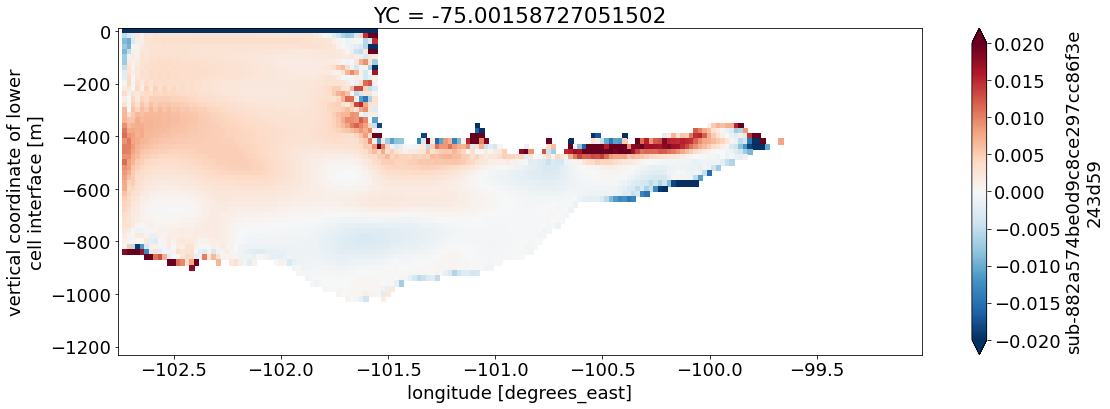

In [68]:
dudz = grid.diff(ds.UVELMASS.where(ds.maskW),'Z',boundary='fill')
dudz.sel(YC=-75,method='nearest').mean('time').plot(vmin=-.02,vmax=.02,cmap='RdBu_r')